In [105]:
%load_ext autoreload
%autoreload 2

from text3d2video.artifacts.anim_artifact import AnimationArtifact
import torch

torch.set_grad_enabled(False)

anim_tag = 'human_mv:latest'
anim_tag = 'mv_cat_statue:latest'

anim = AnimationArtifact.from_wandb_artifact_tag(anim_tag)
seq = anim.read_anim_seq()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


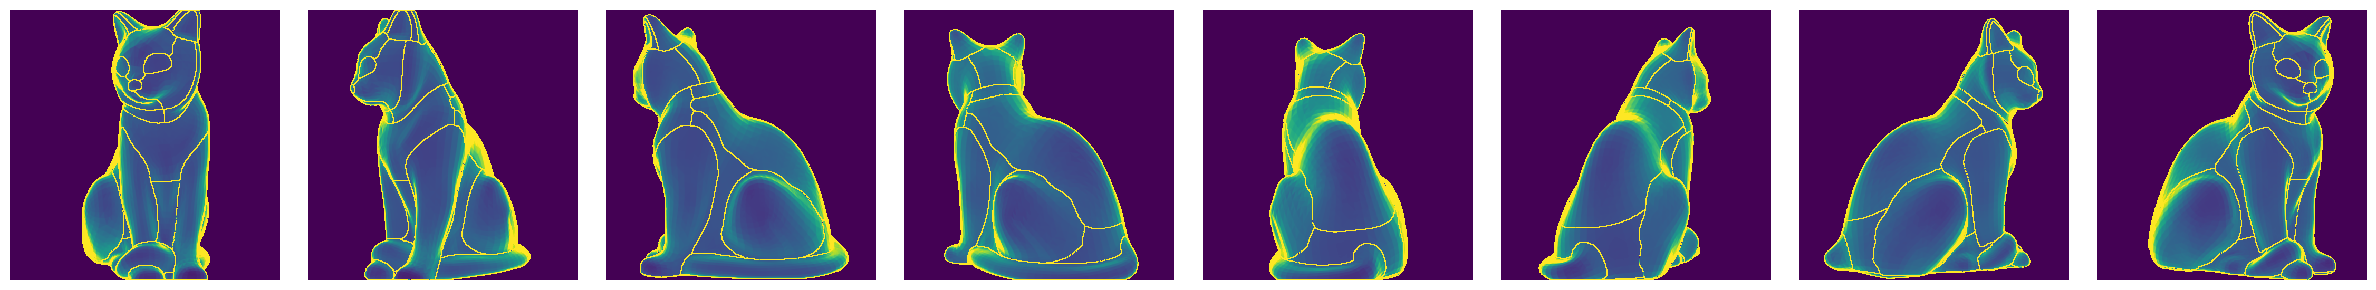

In [109]:
from text3d2video.rendering import compute_uv_jacobian_map
from text3d2video.utilities.ipython_utils import display_ims


quality_maps = torch.stack(
    [
        compute_uv_jacobian_map(c, m, seq.verts_uvs, seq.faces_uvs)
        for c, m in zip(seq.cams, seq.meshes)
    ]
)

display_ims(quality_maps.cpu(), vmin=0, vmax=0.0003)

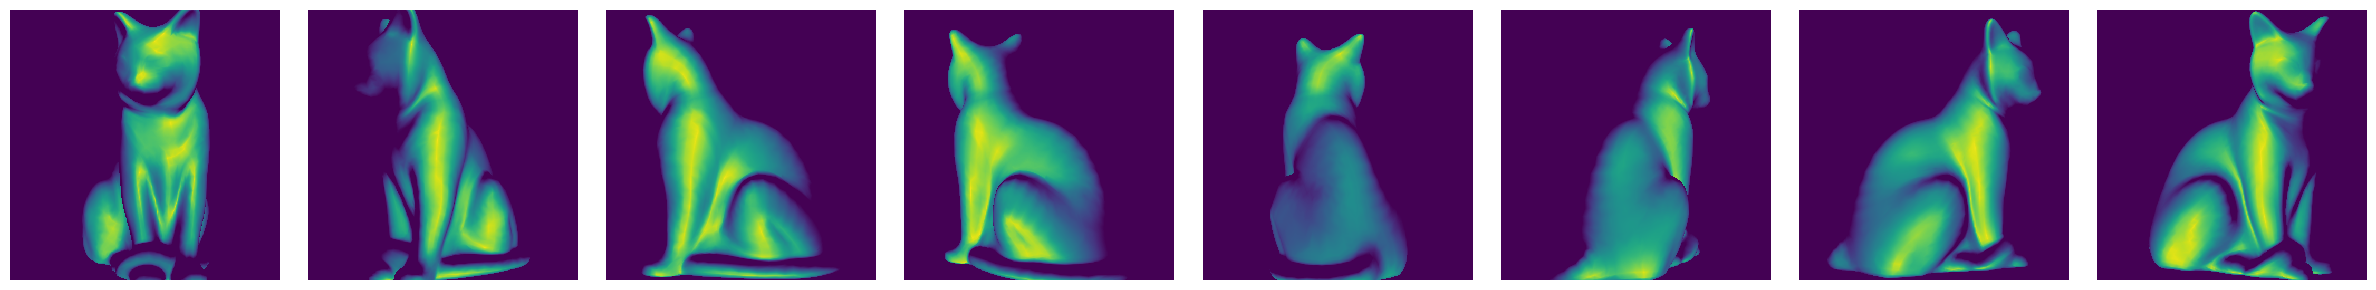

In [122]:
from text3d2video.angle_maps import render_view_angle_map
from text3d2video.utilities.ipython_utils import display_ims

quality_maps = torch.stack(
    [render_view_angle_map(c, m) for c, m in zip(seq.cams, seq.meshes)]
)


display_ims(quality_maps.cpu(), vmin=2, vmax=3.14)